In [8]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [9]:
# Cargar una imagen en modo monocromático (un canal)
imgOini = cv.imread('WP_O.png')
imgBini = cv.imread('WP_B.png')
imgRini = cv.imread('WP_R.png')
# imgOini = cv.imread('test_green.png')
# imgBini = cv.imread('test_blue.png')
# imgRini = cv.imread('test_red.png')


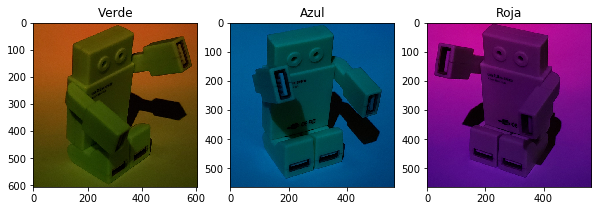

In [10]:
# Nueva figura
fig = plt.figure()

# Conversion de BGR to RGB
imgO = cv.cvtColor(imgOini,cv.COLOR_BGR2RGB)
imgB = cv.cvtColor(imgBini,cv.COLOR_BGR2RGB)
imgR = cv.cvtColor(imgRini,cv.COLOR_BGR2RGB)

# Imagenes convertidas
ax1=plt.subplot(131)
ax1.imshow(imgO)
ax1.set_title('Verde')

ax2=plt.subplot(132)
ax2.imshow(imgB)
ax2.set_title('Azul')

ax3=plt.subplot(133)
ax3.imshow(imgR)
ax3.set_title('Roja')

# Separación de cada imagen en sus distintos canales
im_rO,im_gO,im_bO = cv.split(imgO)
im_rB,im_gB,im_bB = cv.split(imgB)
im_rR,im_gR,im_bR = cv.split(imgR)


In [11]:
# Vamos a determinar el máximo de cada canal y de cada ejemplo.
r_maxO=im_rO.max()
g_maxO=im_gO.max()
b_maxO=im_bO.max()

r_maxB=im_rB.max()
g_maxB=im_gB.max()
b_maxB=im_bB.max()

r_maxR=im_rR.max()
g_maxR=im_gR.max()
b_maxR=im_bR.max()

Text(0.5, 1.0, 'White Patch Roja')

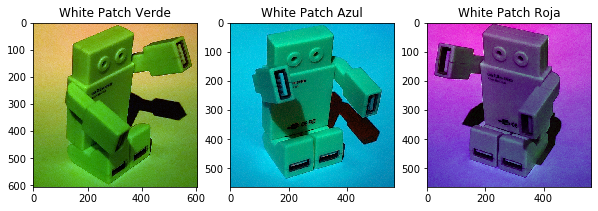

In [12]:
#Aplicamos la multiplicación por una constante a cada canal y 
# aplicamos el algoritmo whit patch a la imagen original
wp_rO=(255/r_maxO)*im_rO
wp_gO=(255/g_maxO)*im_gO
wp_bO=(255/b_maxO)*im_bO
np.clip(wp_rO, 0, 255, out=wp_rO)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_gO, 0, 255, out=wp_gO)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_bO, 0, 255, out=wp_bO)   # Clip trunca a lo que se le diga (0 a 255)
wp_rO=wp_rO.astype('uint8')         # Convierto a 8 bits
wp_gO=wp_gO.astype('uint8')         # Convierto a 8 bits
wp_bO=wp_bO.astype('uint8')         # Convierto a 8 bits

wp_rB=(255/r_maxB)*im_rB
wp_gB=(255/g_maxB)*im_gB
wp_bB=(255/b_maxB)*im_bB
wp_rB=wp_rB.astype('uint8')         # Convierto a 8 bits
wp_gB=wp_gB.astype('uint8')         # Convierto a 8 bits
wp_bB=wp_bB.astype('uint8')         # Convierto a 8 bits

wp_rR=(255/r_maxR)*im_rR
wp_gR=(255/g_maxR)*im_gR
wp_bR=(255/b_maxR)*im_bR
wp_rR=wp_rR.astype('uint8')         # Convierto a 8 bits
wp_gR=wp_gR.astype('uint8')         # Convierto a 8 bits
wp_bR=wp_bR.astype('uint8')         # Convierto a 8 bits


wp_O = cv.merge((wp_rO,wp_gO,wp_bO))
wp_R = cv.merge((wp_rR,wp_gR,wp_bR))
wp_B = cv.merge((wp_rB,wp_gB,wp_bB))

fig2 = plt.figure()
ax1=plt.subplot(131)
ax1.imshow(wp_O)
ax1.set_title('White Patch Verde')
ax2=plt.subplot(132)
ax2.imshow(wp_B)
ax2.set_title('White Patch Azul')
ax3=plt.subplot(133)
ax3.imshow(wp_R)
ax3.set_title('White Patch Roja')


Text(0.5, 1.0, 'WP Roja al 70%')

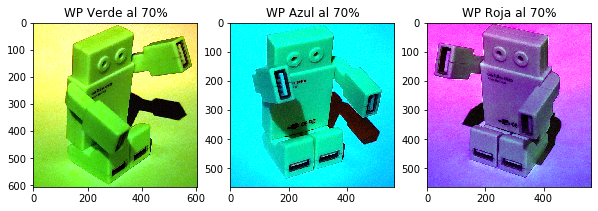

In [13]:
# Dado que no alcanzamos a obtener el fondo blanco por la gran saturación de colores,
# vamos a probar con el percentil 70.
perc = 0.7
r_maxO=im_rO.max()*perc
g_maxO=im_gO.max()*perc
b_maxO=im_bO.max()*perc

r_maxB=im_rB.max()*perc
g_maxB=im_gB.max()*perc
b_maxB=im_bB.max()*perc

r_maxR=im_rR.max()*perc
g_maxR=im_gR.max()*perc
b_maxR=im_bR.max()*perc

wp_rO=(255/r_maxO)*im_rO
wp_gO=(255/g_maxO)*im_gO
wp_bO=(255/b_maxO)*im_bO
np.clip(wp_rO, 0, 255, out=wp_rO)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_gO, 0, 255, out=wp_gO)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_bO, 0, 255, out=wp_bO)   # Clip trunca a lo que se le diga (0 a 255)
wp_rO=wp_rO.astype('uint8')         # Convierto a 8 bits
wp_gO=wp_gO.astype('uint8')         # Convierto a 8 bits
wp_bO=wp_bO.astype('uint8')         # Convierto a 8 bits

wp_rB=(255/r_maxB)*im_rB
wp_gB=(255/g_maxB)*im_gB
wp_bB=(255/b_maxB)*im_bB
np.clip(wp_rB, 0, 255, out=wp_rB)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_gB, 0, 255, out=wp_gB)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_bB, 0, 255, out=wp_bB)   # Clip trunca a lo que se le diga (0 a 255)
wp_rB=wp_rB.astype('uint8')         # Convierto a 8 bits
wp_gB=wp_gB.astype('uint8')         # Convierto a 8 bits
wp_bB=wp_bB.astype('uint8')         # Convierto a 8 bits

wp_rR=(255/r_maxR)*im_rR
wp_gR=(255/g_maxR)*im_gR
wp_bR=(255/b_maxR)*im_bR
np.clip(wp_rR, 0, 255, out=wp_rR)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_gR, 0, 255, out=wp_gR)   # Clip trunca a lo que se le diga (0 a 255)
np.clip(wp_bR, 0, 255, out=wp_bR)   # Clip trunca a lo que se le diga (0 a 255)
wp_rR=wp_rR.astype('uint8')         # Convierto a 8 bits
wp_gR=wp_gR.astype('uint8')         # Convierto a 8 bits
wp_bR=wp_bR.astype('uint8')         # Convierto a 8 bits


wp_O = cv.merge((wp_rO,wp_gO,wp_bO))
wp_R = cv.merge((wp_rR,wp_gR,wp_bR))
wp_B = cv.merge((wp_rB,wp_gB,wp_bB))

fig2 = plt.figure()
ax1=plt.subplot(131)
ax1.imshow(wp_O)
ax1.set_title('WP Verde al 70%')
ax2=plt.subplot(132)
ax2.imshow(wp_B)
ax2.set_title('WP Azul al 70%')
ax3=plt.subplot(133)
ax3.imshow(wp_R)
ax3.set_title('WP Roja al 70%')


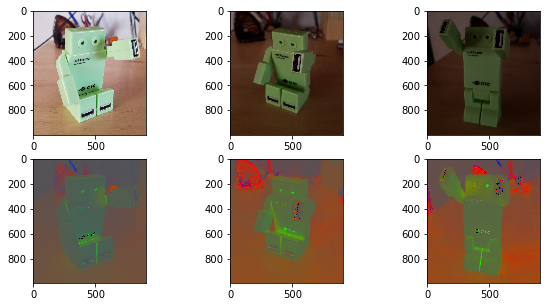

In [14]:
# Iniciamos algoritmo de coordenadas cromáticas, primero leyendo las imagenes y corrijiendo los canales.
ccr1 = cv.imread('CoordCrom_1.png')
ccr2 = cv.imread('CoordCrom_2.png')
ccr3 = cv.imread('CoordCrom_3.png')
ccr1 = cv.cvtColor(ccr1, cv.COLOR_BGR2RGB)
ccr2 = cv.cvtColor(ccr2, cv.COLOR_BGR2RGB)
ccr3 = cv.cvtColor(ccr3, cv.COLOR_BGR2RGB)

fig = plt.figure()
ax1=plt.subplot(231)
ax1.imshow(ccr1)
ax2=plt.subplot(232)
ax2.imshow(ccr2)
ax3=plt.subplot(233)
ax3.imshow(ccr3)

# Vectores por cada pixel con suma de los valores de cada canal
rgb1 = ccr1.sum(axis=2)[:,:,np.newaxis]
rgb2 = ccr2.sum(axis=2)[:,:,np.newaxis]
rgb3 = ccr3.sum(axis=2)[:,:,np.newaxis]
# En caso de ser cero cambiamos el valor para evitar ivision por 0
rgb1[rgb1 == 0] = 1
rgb2[rgb2 == 0] = 1
rgb3[rgb3 == 0] = 1
# Aplicamos algoritmo de coordenadas cromáticas y lo escalamos
img1 = (ccr1/rgb1)*255
img2 = (ccr2/rgb2)*255
img3 = (ccr3/rgb3)*255

np.clip(img1, 0, 255, out=img1) #Truncar a 255
np.clip(img2, 0, 255, out=img2) #Truncar a 255
np.clip(img3, 0, 255, out=img3) #Truncar a 255
img1 = img1.astype('uint8')
img2 = img2.astype('uint8')
img3 = img3.astype('uint8')

ax4 = plt.subplot(234)
ax4.imshow(img1)
ax5 = plt.subplot(235)
ax5.imshow(img2)
ax6 = plt.subplot(236)
ax6.imshow(img3)